<a href="https://colab.research.google.com/github/ykabir19/ykabir19/blob/main/Customer_Segmentation_Using_RFM_analysis_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

In [ ]:
#Impoert dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00502/online_retail_II.xlsx"
data = pd.read_excel(url)
data.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [ ]:
# Clean the dataset
data = data.dropna(subset=['Customer ID'])  # Remove rows with missing customer IDs
data = data[data['Quantity'] > 0]  # Remove rows with negative or zero quantity
data = data[data['Price'] > 0]  # Remove rows with negative or zero price

Dataset Shape: (407664, 8)

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 407664 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   Invoice      407664 non-null  object        
 1   StockCode    407664 non-null  object        
 2   Description  407664 non-null  object        
 3   Quantity     407664 non-null  int64         
 4   InvoiceDate  407664 non-null  datetime64[ns]
 5   Price        407664 non-null  float64       
 6   Customer ID  407664 non-null  float64       
 7   Country      407664 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 28.0+ MB
None

Descriptive Statistics:
            Quantity          Price    Customer ID
count  407664.000000  407664.000000  407664.000000
mean       13.585585       3.294438   15368.592598
std        96.840747      34.757965    1679.762138
min         1.000000       0.001

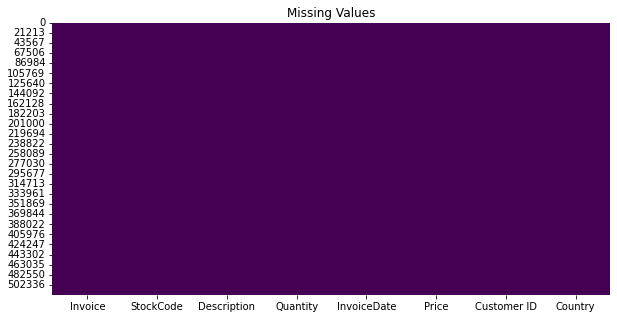

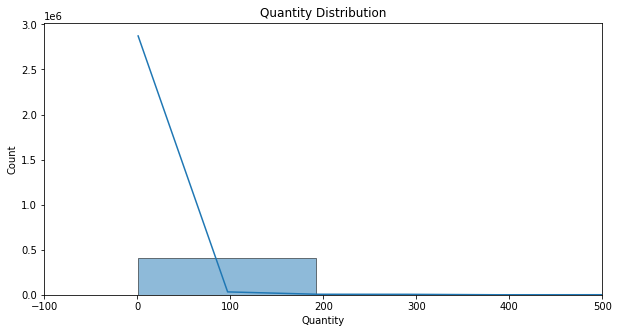

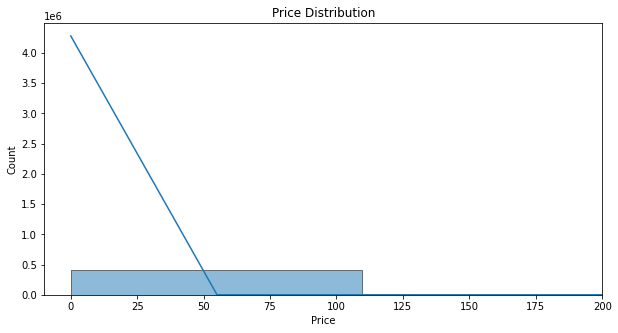

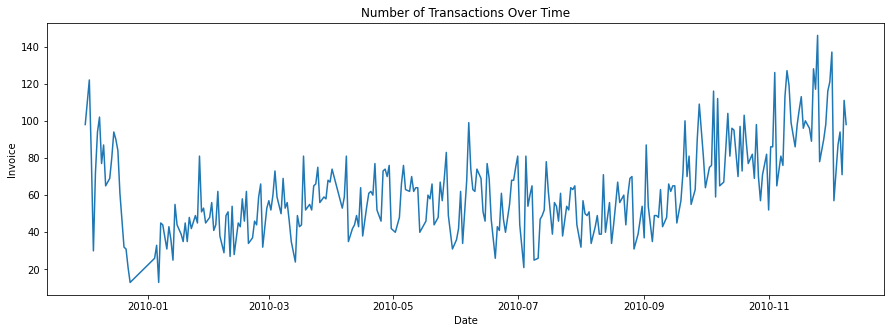

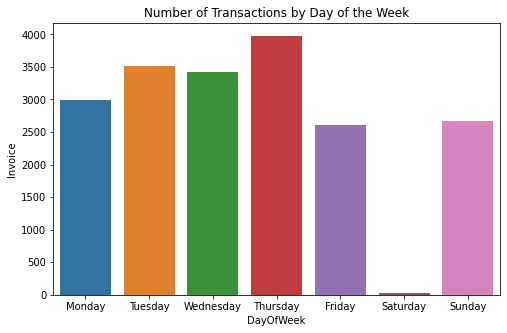

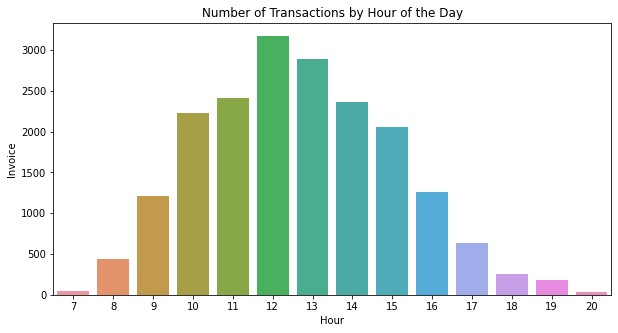

In [ ]:
#EDA
# Print the shape and basic info about the dataset
print("Dataset Shape:", data.shape)
print("\nDataset Info:")
print(data.info())

# Calculate basic descriptive statistics
print("\nDescriptive Statistics:")
print(data.describe())

# Visualize missing values
plt.figure(figsize=(10, 5))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis')
plt.title('Missing Values')
plt.show()

# Plot the distribution of Quantity and Price
plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Quantity', bins=100, kde=True)
plt.title('Quantity Distribution')
plt.xlim(-100, 500)  # Adjust limits for better visualization
plt.show()

plt.figure(figsize=(10, 5))
sns.histplot(data=data, x='Price', bins=100, kde=True)
plt.title('Price Distribution')
plt.xlim(-10, 200)  # Adjust limits for better visualization
plt.show()

# Analyze the number of transactions over time
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['Date'] = data['InvoiceDate'].dt.date
transactions_by_date = data.groupby(['Date']).agg({'Invoice': pd.Series.nunique}).reset_index()

plt.figure(figsize=(15, 5))
sns.lineplot(data=transactions_by_date, x='Date', y='Invoice')
plt.title('Number of Transactions Over Time')
plt.show()

# Analyze the number of transactions by day of the week
data['DayOfWeek'] = data['InvoiceDate'].dt.dayofweek
transactions_by_day = data.groupby(['DayOfWeek']).agg({'Invoice': pd.Series.nunique}).reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(data=transactions_by_day, x='DayOfWeek', y='Invoice')
plt.title('Number of Transactions by Day of the Week')
plt.xticks(ticks=range(7), labels=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'])
plt.show()

# Analyze the number of transactions by hour of the day
data['Hour'] = data['InvoiceDate'].dt.hour
transactions_by_hour = data.groupby(['Hour']).agg({'Invoice': pd.Series.nunique}).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(data=transactions_by_hour, x='Hour', y='Invoice')
plt.title('Number of Transactions by Hour of the Day')
plt.show()

In [ ]:
# Calculate Recency, Frequency, and Monetary Value
snapshot_date = data['InvoiceDate'].max() + pd.DateOffset(days=1)
data['TotalSum'] = data['Quantity'] * data['Price']
rfm_data = data.groupby(['Customer ID']).agg({
    'InvoiceDate': lambda x: (snapshot_date - x.max()).days,
    'Invoice': 'nunique',
    'TotalSum': 'sum'
}).reset_index()

rfm_data.rename(columns={'InvoiceDate': 'Recency',
                         'Invoice': 'Frequency',
                         'TotalSum': 'MonetaryValue'}, inplace=True)

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: F

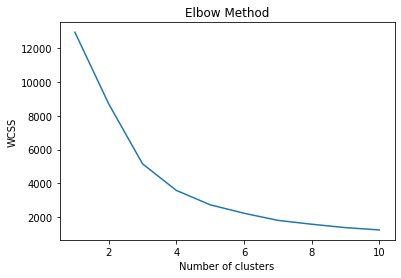

/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [ ]:
# Scale the data
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm_data[['Recency', 'Frequency', 'MonetaryValue']])

# Find the optimal number of clusters using the elbow method
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering
n_clusters = 4  # Based on the elbow method
kmeans = KMeans(n_clusters=n_clusters, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(rfm_scaled)

# Add cluster labels to the original RFM data
rfm_data['Cluster'] = clusters

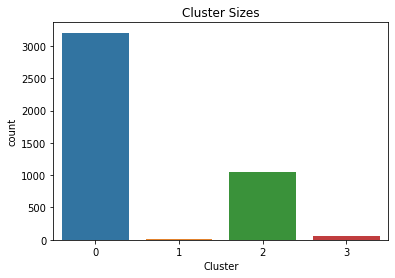

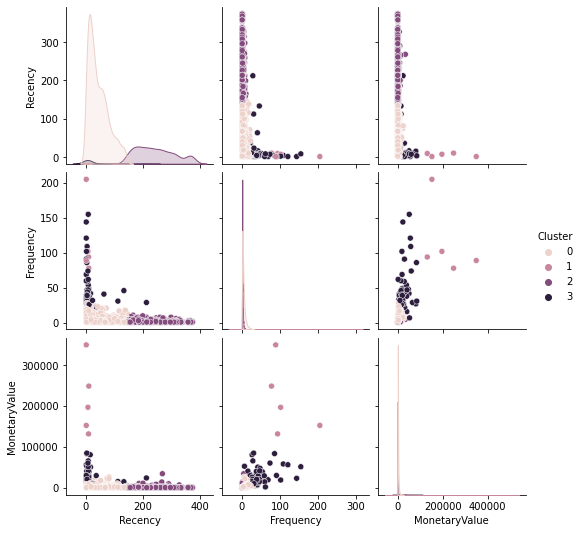

   Cluster  Recency_Mean  Recency_Median  Frequency_Mean  Frequency_Median  \
0        0     43.031835            32.0        4.455056               3.0   
1        1      5.600000             7.0      113.600000              94.0   
2        2    242.976122           233.0        1.659981               1.0   
3        3     14.910714             5.0       47.017857              39.0   

   MonetaryValue_Mean  MonetaryValue_Median  Count  
0         1719.021641               925.765   3204  
1       215543.670000            196566.740      5  
2          596.884493               306.580   1047  
3        28957.170054             22759.090     56  


In [ ]:
# Plot cluster sizes
sns.countplot(data=rfm_data, x='Cluster')
plt.title('Cluster Sizes')
plt.show()

# Visualize clusters using pairplot
sns.pairplot(data=rfm_data, hue='Cluster', vars=['Recency', 'Frequency', 'MonetaryValue'])
plt.show()

# Calculate descriptive statistics for each cluster
cluster_stats = rfm_data.groupby(['Cluster']).agg(
    Recency_Mean=('Recency', 'mean'),
    Recency_Median=('Recency', 'median'),
    Frequency_Mean=('Frequency', 'mean'),
    Frequency_Median=('Frequency', 'median'),
    MonetaryValue_Mean=('MonetaryValue', 'mean'),
    MonetaryValue_Median=('MonetaryValue', 'median'),
    Count=('Customer ID', 'count')
).reset_index()

print(cluster_stats)

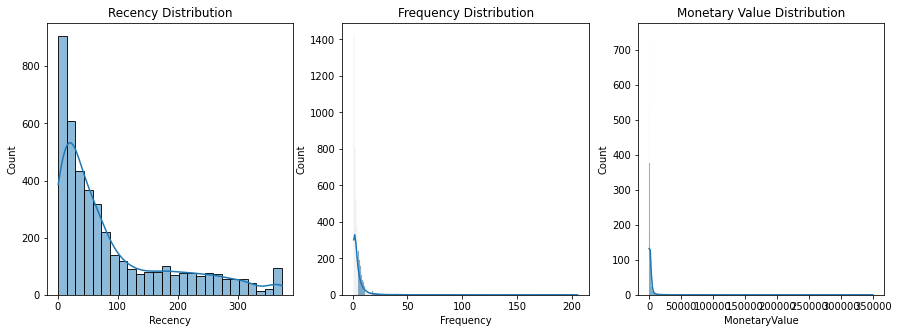

In [ ]:
# Plot the distribution of Recency, Frequency, and MonetaryValue
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(data=rfm_data, x='Recency', kde=True, ax=axes[0])
sns.histplot(data=rfm_data, x='Frequency', kde=True, ax=axes[1])
sns.histplot(data=rfm_data, x='MonetaryValue', kde=True, ax=axes[2])
axes[0].set_title('Recency Distribution')
axes[1].set_title('Frequency Distribution')
axes[2].set_title('Monetary Value Distribution')
plt.show()

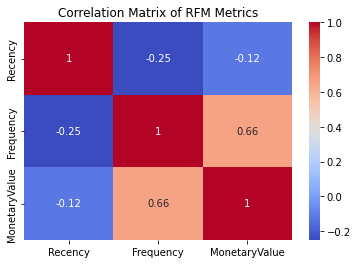

In [ ]:
# Calculate the correlation between RFM metrics
corr_matrix = rfm_data[['Recency', 'Frequency', 'MonetaryValue']].corr()

# Visualize the correlation using a heatmap
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix of RFM Metrics')
plt.show()

In [ ]:
# The last code block in step 8 is commented out, as it requires an external mapping or manual classification of products to categories. Once you have a mapping, you can uncomment and adapt the code to analyze the impact of product categories on customer segments.

# By following these steps, you can create various visualizations and descriptive statistics to analyze the impact of big data analytics on customer segmentation and marketing strategies in the retail industry.

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans

In [ ]:
# Vectorize the product descriptions:
# Create a TfidfVectorizer instance
vectorizer = TfidfVectorizer(stop_words='english')

# Fit and transform the product descriptions
product_descriptions = data['Description'].unique()
X = vectorizer.fit_transform(product_descriptions)


/usr/local/lib/python3.9/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


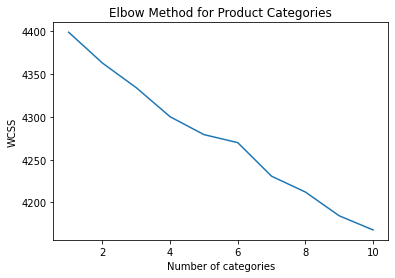

In [ ]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Elbow Method for Product Categories')
plt.xlabel('Number of categories')
plt.ylabel('WCSS')
plt.show()

# Apply K-means clustering to the product descriptions
n_categories = 6  # Based on the elbow method (adjust as needed)
kmeans = KMeans(n_clusters=n_categories, init='k-means++', random_state=42)
categories = kmeans.fit_predict(X)

In [ ]:
# Create a DataFrame mapping product descriptions to categories
description_category = pd.DataFrame({'Description': product_descriptions, 'Category': categories})

# Merge the category mapping with the original data
data_with_categories = data.merge(description_category, on='Description')

In [ ]:
# Calculate category-related metrics for each customer:
category_metrics = data_with_categories.groupby(['Customer ID', 'Category']).agg({'Quantity': 'sum', 'TotalSum': 'sum'}).reset_index()

In [ ]:
# Merge category metrics with RFM data and clusters:
rfm_category_data = rfm_data.merge(category_metrics, on='Customer ID')

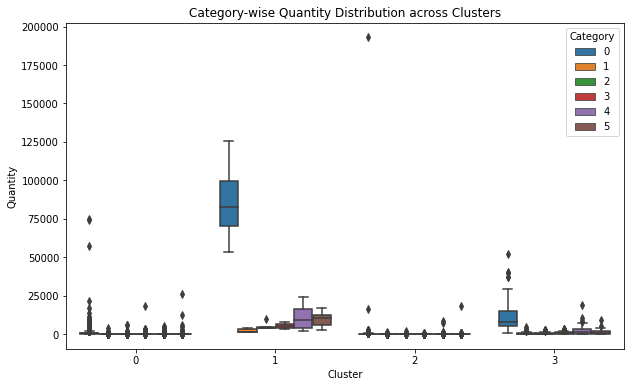

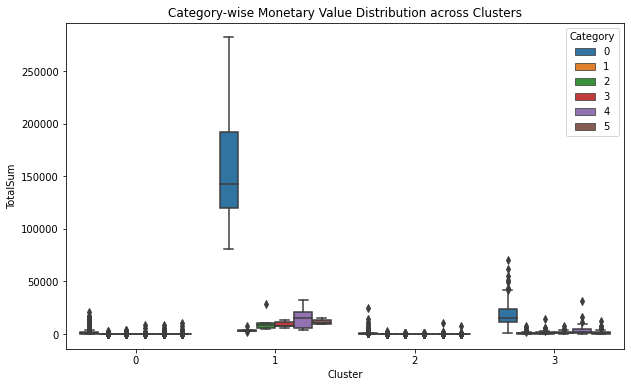

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm_category_data, x='Cluster', y='Quantity', hue='Category')
plt.title('Category-wise Quantity Distribution across Clusters')
plt.show()

plt.figure(figsize=(10, 6))
sns.boxplot(data=rfm_category_data, x='Cluster', y='TotalSum', hue='Category')
plt.title('Category-wise Monetary Value Distribution across Clusters')
plt.show()

In [ ]:
def label_segments(row):
    if row['MonetaryValue'] > rfm_data['MonetaryValue'].quantile(0.66) and row['Frequency'] > rfm_data['Frequency'].quantile(0.66) and row['Recency'] < rfm_data['Recency'].quantile(0.33):
        return 'Champions'
    elif row['MonetaryValue'] > rfm_data['MonetaryValue'].quantile(0.33) and row['Frequency'] > rfm_data['Frequency'].quantile(0.33) and row['Recency'] < rfm_data['Recency'].quantile(0.66):
        return 'Loyal Customers'
    elif row['MonetaryValue'] > rfm_data['MonetaryValue'].quantile(0.33) and row['Frequency'] > rfm_data['Frequency'].quantile(0.33) and row['Recency'] < rfm_data['Recency'].quantile(0.33):
        return 'Potential Loyalists'
    elif row['MonetaryValue'] > rfm_data['MonetaryValue'].quantile(0.33) and row['Frequency'] > rfm_data['Frequency'].quantile(0.33) and row['Recency'] > rfm_data['Recency'].quantile(0.66):
        return 'At-Risk Customers'
    elif row['MonetaryValue'] < rfm_data['MonetaryValue'].quantile(0.33) and row['Frequency'] < rfm_data['Frequency'].quantile(0.33) and row['Recency'] < rfm_data['Recency'].quantile(0.33):
        return 'New Customers'
    else:
        return 'Lost Customers'

rfm_data['Segment'] = rfm_data.apply(label_segments, axis=1)


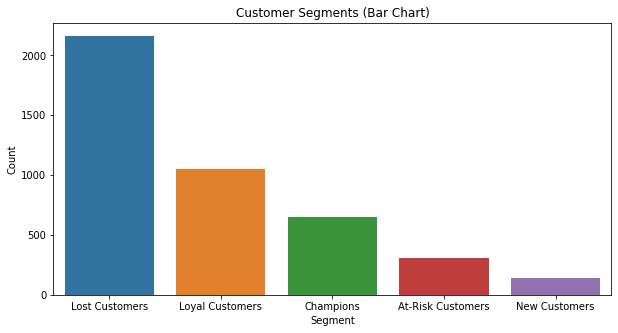

In [ ]:
# Bar chart of segment sizes
segment_counts = rfm_data['Segment'].value_counts()
plt.figure(figsize=(10, 5))
sns.barplot(x=segment_counts.index, y=segment_counts.values)
plt.title('Customer Segments (Bar Chart)')
plt.xlabel('Segment')
plt.ylabel('Count')
plt.show()

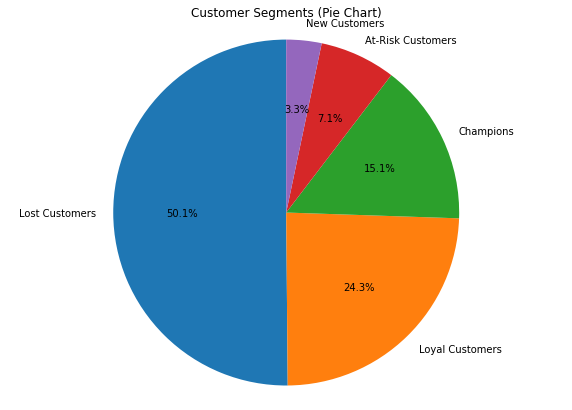

In [ ]:
# Pie chart of segment sizes
plt.figure(figsize=(10, 7))
plt.pie(segment_counts.values, labels=segment_counts.index, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Customer Segments (Pie Chart)')
plt.show()

In [ ]:
# Calculate the summary statistics for each segment
segment_summary = rfm_data.groupby('Segment').agg(
    Recency_Mean=('Recency', 'mean'),
    Recency_Median=('Recency', 'median'),
    Frequency_Mean=('Frequency', 'mean'),
    Frequency_Median=('Frequency', 'median'),
    MonetaryValue_Mean=('MonetaryValue', 'mean'),
    MonetaryValue_Median=('MonetaryValue', 'median'),
    Count=('Customer ID', 'count')
).reset_index()

# Display the summary table
print(segment_summary)

             Segment  Recency_Mean  Recency_Median  Frequency_Mean  \
0  At-Risk Customers    156.032680           138.0        4.810458   
1          Champions      9.906585             9.0       13.918836   
2     Lost Customers    137.404255            99.0        1.465772   
3    Loyal Customers     37.924690            35.0        5.091516   
4      New Customers     14.556338            15.5        1.000000   

   Frequency_Median  MonetaryValue_Mean  MonetaryValue_Median  Count  
0               4.0         1992.045621              1256.690    306  
1               9.0         7717.177054              3329.390    653  
2               1.0          501.358508               331.760   2162  
3               4.0         1971.937058              1254.210   1049  
4               1.0          215.645282               219.975    142  


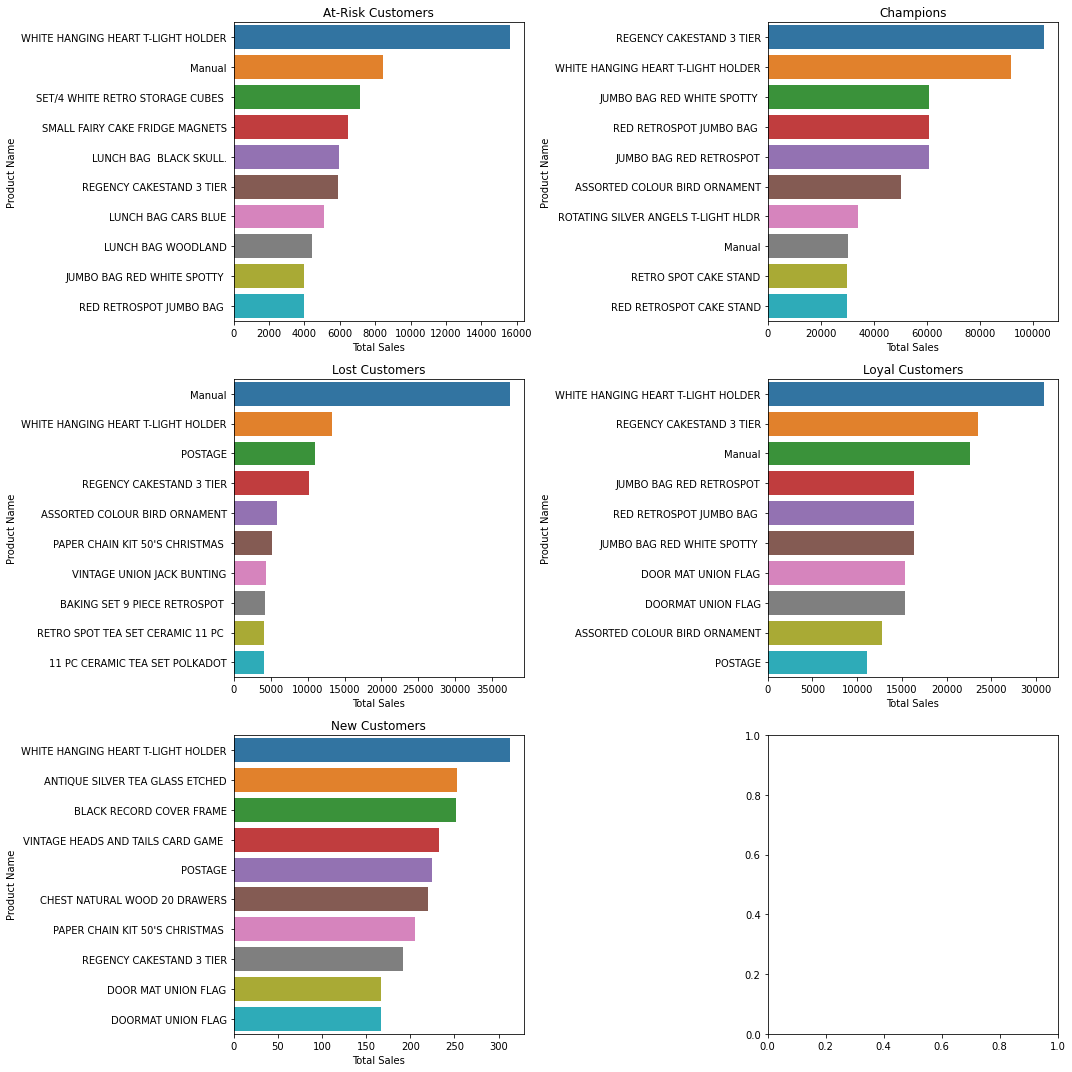

In [ ]:
# Merge purchase data with RFM segment labels
segment_data = pd.merge(data, rfm_data[['Customer ID', 'Segment']], on='Customer ID')

# Group purchase information by customer ID and product ID
segment_product_data = segment_data.groupby(['Customer ID', 'Segment', 'StockCode']).agg(
    Quantity=('Quantity', 'sum'),
    TotalSum=('TotalSum', 'sum')
).reset_index()

# Group purchase information by customer segment and product ID
segment_product_data = segment_product_data.groupby(['Segment', 'StockCode']).agg(
    Quantity=('Quantity', 'sum'),
    TotalSum=('TotalSum', 'sum')
).reset_index()

# Obtain product names from the original data
product_data = data[['StockCode', 'Description']].drop_duplicates()

# Merge with product data to obtain product names
segment_product_data = pd.merge(segment_product_data, product_data, on='StockCode')

# Sort the data to obtain the top products for each segment
top_products_by_segment = {}
for segment in segment_product_data['Segment'].unique():
    segment_data = segment_product_data[segment_product_data['Segment'] == segment].sort_values('TotalSum', ascending=False)
    top_products_by_segment[segment] = segment_data.head(10)

# Create a bar graph of the top products for each segment
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
for i, segment in enumerate(top_products_by_segment.keys()):
    row, col = i // 2, i % 2
    top_products_data = top_products_by_segment[segment]
    sns.barplot(data=top_products_data, x='TotalSum', y='Description', ax=axes[row][col])
    axes[row][col].set_title(segment)
    axes[row][col].set_xlabel('Total Sales')
    axes[row][col].set_ylabel('Product Name')
plt.tight_layout()
plt.show()





